### Heart Disease Prediction Using Logistic Regression

### Introduction
<p>Predicting heart disease is crucial for timely intervention and effective treatment. This project employs a Logistic Regression model to enhance predictive capabilities for diagnosing heart disease based on various health indicators.</p>

<p><b>Data Description</b>
The dataset used in this project, heart_statlog_cleveland_hungary_final.csv from kaggle, includes the following columns:

<b>age: </b> Age of the patient </br> 
<b>sex:</b> Gender of the patient (1 = male, 0 = female)  </br>
<b>chest pain type: </b>Type of chest pain experienced by the patient (categorical)  </br>
<b>resting bp s:</b> Resting blood pressure (in mm Hg)  </br>
<b>cholesterol:</b> Serum cholesterol level (in mg/dl)    </br>
<b>fasting blood sugar:</b> Fasting blood sugar (1 = > 120 mg/dl, 0 = ≤ 120 mg/dl)   </br>
<b>resting ecg:</b> Resting electrocardiographic results (categorical)     </br>
<b>max heart rate:</b> Maximum heart rate achieved   </br>
<b>exercise angina:</b> Exercise induced angina (1 = yes, 0 = no)      </br>
<b>oldpeak:</b> Depression induced by exercise relative to rest    </br>
<b>ST slope:</b> Slope of the peak exercise ST segment (categorical)       </br>
<b>target: </b>Presence or absence of heart disease (1 = presence, 0 = absence) </p>

### Data Exploration
### Data Loading

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\Datascience\Practise_own_data\heart_statlog_cleveland_hungary_final.csv")

In [2]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Data Overview

In [4]:
# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Statistical Summary

In [5]:
# Display summary statistics of selected columns
data = df[['age', 'cholesterol', 'fasting blood sugar', 'ST slope', 'chest pain type']]
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
ST slope,1190.0,1.624370,0.610459,0.0,1.0,2.0,2.00,3.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0


### Data Visualization

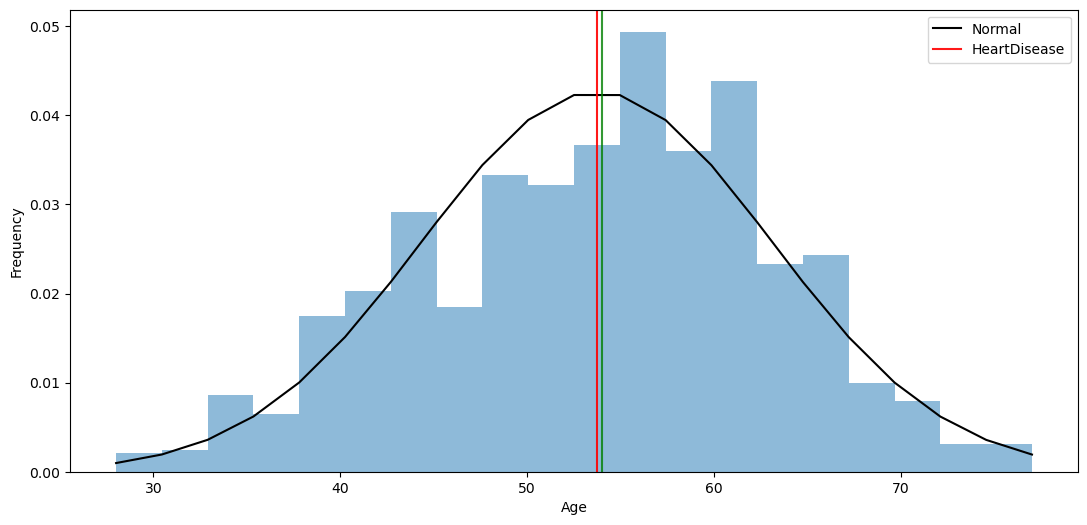

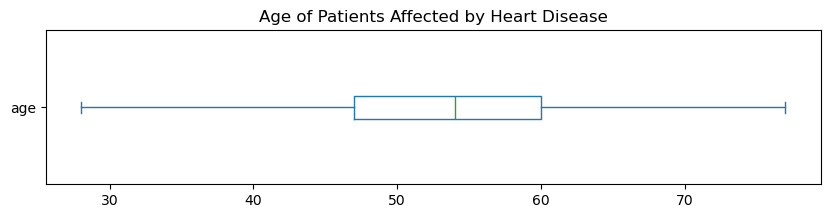

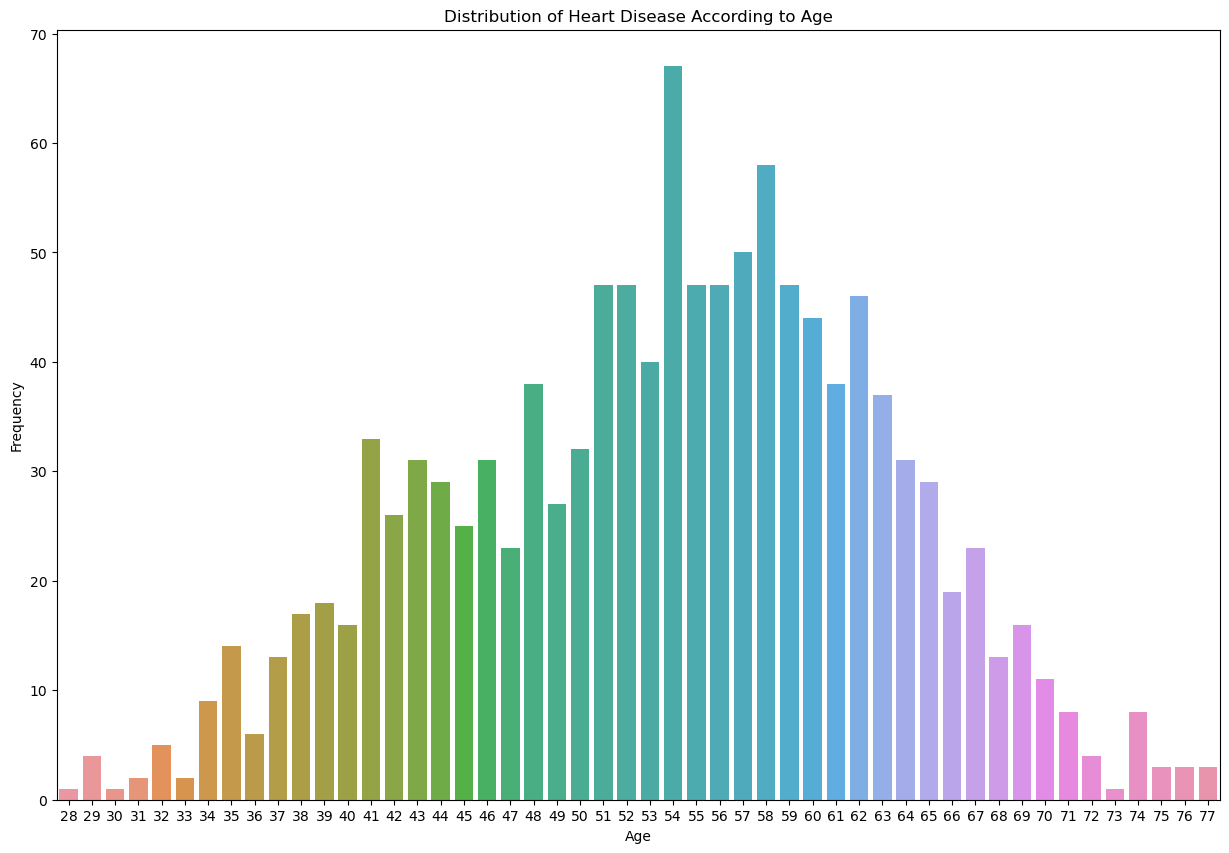

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts

# Plot histogram of age
plt.figure(figsize=(13, 6))
_, bins, _ = plt.hist(df['age'], bins=20, density=1, alpha=0.5)
mn, std = sts.norm.fit(df['age'])
y_curve = sts.norm.pdf(bins, mn, std)
plt.plot(bins, y_curve, 'k')
plt.axvline(df['age'].mean(), color='r', alpha=0.9, label="Mean")
plt.axvline(df['age'].median(), color='g', alpha=0.8, label="Median")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Normal', 'HeartDisease'])
plt.show()

# Boxplot for age
plt.figure(figsize=(10, 2))
df['age'].plot(kind='box', title='Age of Patients Affected by Heart Disease', vert=False)
plt.show()

# Count plot for age distribution
plt.figure(figsize=(15, 10))
sns.countplot(x='age', data=df)
plt.title("Distribution of Heart Disease According to Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Correlation Analysis

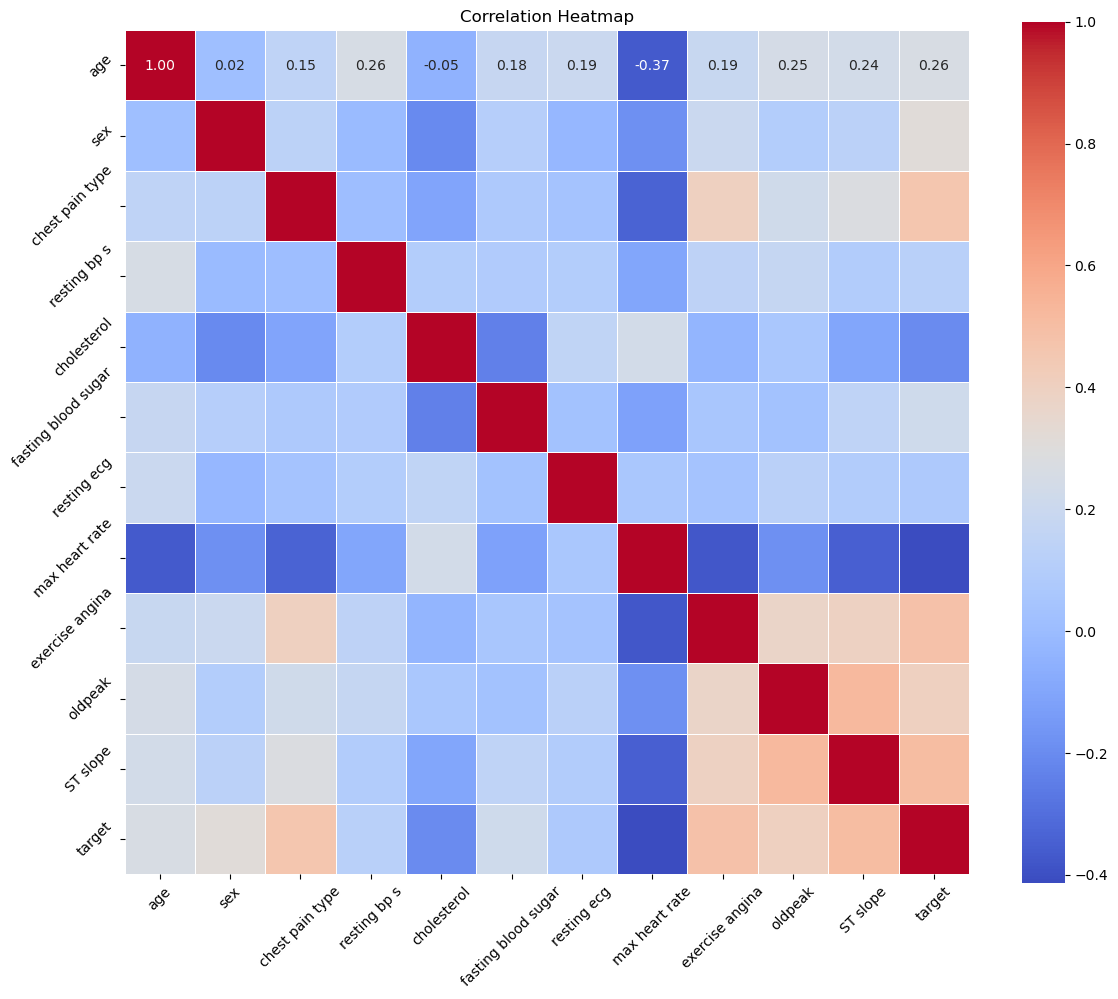

In [7]:
# Calculate and plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature Engineering and Preprocessing
### Data Preparation 

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Selecting relevant features and target
features = ['chest pain type', 'exercise angina', 'ST slope']
x = df[features].values
y = df['target'].values

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Scaling features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Model Building
### Logistic Regression

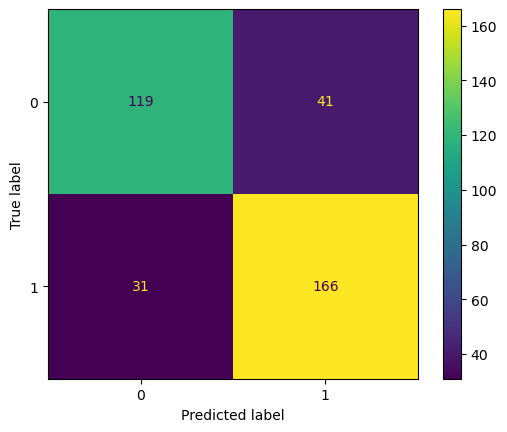

Model Accuracy: 0.80


In [9]:
# Create and train Logistic Regression model
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
conf_matrix_disp.plot()
plt.show()

print(f"Model Accuracy: {accuracy:.2f}")


### Feature Importance

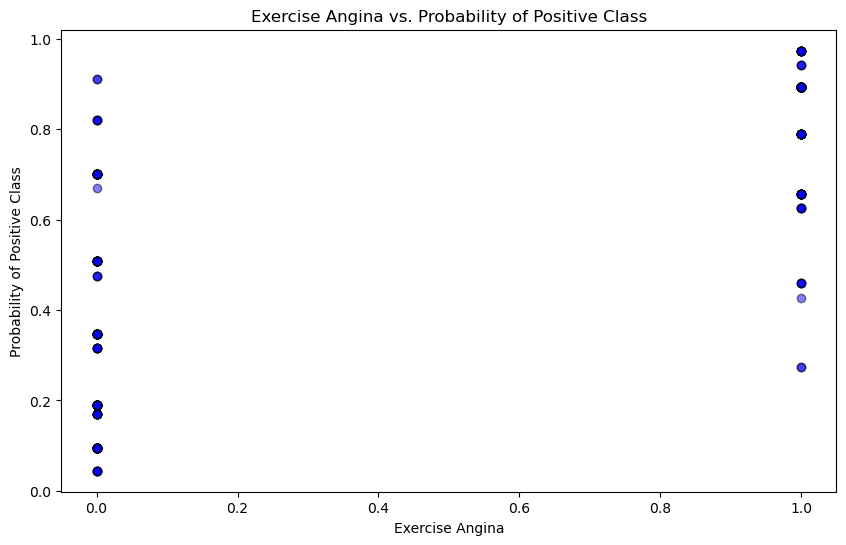

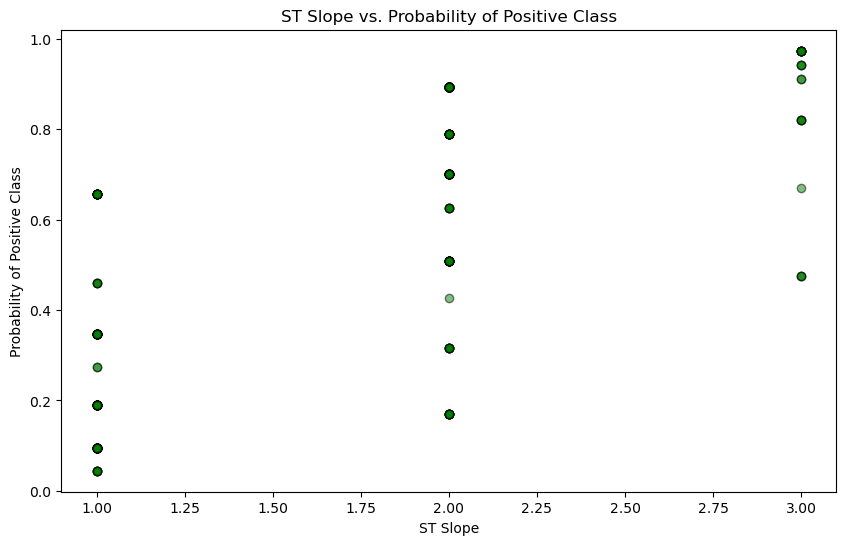

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get predicted probabilities
predicted_probabilities = model.predict_proba(x_test_scaled)[:, 1]

# Plot Exercise Angina vs. Probability
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 1], predicted_probabilities, alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Exercise Angina')
plt.ylabel('Probability of Positive Class')
plt.title('Exercise Angina vs. Probability of Positive Class')
plt.show()

# Plot ST Slope vs. Probability
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 2], predicted_probabilities, alpha=0.5, c='green', edgecolor='k')
plt.xlabel('ST Slope')
plt.ylabel('Probability of Positive Class')
plt.title('ST Slope vs. Probability of Positive Class')
plt.show()


<p>Conclusion
The Logistic Regression model demonstrates effective predictive capability for heart disease using selected features. Key predictors such as chest pain type, exercise angina, and ST slope exhibit significant relationships with heart disease, providing valuable insights for early diagnosis and intervention.

Future Work
Feature Expansion: Explore additional features or interactions between features.
Model Comparison: Compare Logistic Regression with other machine learning algorithms (e.g., Random Forest, SVM).
Hyperparameter Tuning: Optimize model parameters for improved performance.
Deployment: Implement the model in a real-world application for practical use.</p>